In [101]:
from datasets import load_dataset, load_from_disk, Dataset, DatasetDict, concatenate_datasets
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance


import json
import matplotlib.pyplot as plt

In [102]:
# label: true = 0, fake = 1

In [103]:
experiment_name = "gpt2_test"
fake_train_dataset = load_from_disk(f"fake_true_dataset_{experiment_name}")

In [104]:
# save to json
#fake_train_dataset["train"].to_json("fake_true_dataset.json", force_ascii=True)

# load to pandas
df = pd.DataFrame(fake_train_dataset['train'])

# transform text to list by splitting on \n
df["text"] = df["text"].apply(lambda x: x.split("\n"))

# dump to json
df.to_json(f"fake_true_dataset_{experiment_name}.json", force_ascii=False, indent=4)



In [105]:
fake_train_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 14
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 2
    })
})

In [106]:
fake_train_dataset['train'][0]

{'text': "By . Kristie Lau . PUBLISHED: . 10:48 EST, 14 June 2012 . | . UPDATED: . 11:02 EST, 14 June 2012 . TLC has pulled an episode of Cake Boss from future screening schedules after receiving complaints over the show's mishandling of a transgender guest star. The episode, which aired on Monday night, showed transgender Carmen Carerra, 27, who was born as a man, take part in a stunt that she believed was edited to look distasteful. The stunt involved Buddy 'Cake Boss' Valastro, the reality show's star,",
 'label': 0}

In [107]:
print(fake_train_dataset['train'][0]['text'])

By . Kristie Lau . PUBLISHED: . 10:48 EST, 14 June 2012 . | . UPDATED: . 11:02 EST, 14 June 2012 . TLC has pulled an episode of Cake Boss from future screening schedules after receiving complaints over the show's mishandling of a transgender guest star. The episode, which aired on Monday night, showed transgender Carmen Carerra, 27, who was born as a man, take part in a stunt that she believed was edited to look distasteful. The stunt involved Buddy 'Cake Boss' Valastro, the reality show's star,


In [108]:
fake_train_dataset['train'][2]

{'text': 'Roy Hodgson has come under fire for making public Raheem Sterling\'s admission that he was feeling tired ahead of England\'s friendly against Slovakia at Wembley last weekend. , who is due to make his debut as an unused substitute after being substituted in the 2-1 win over Czech Republic on Tuesday night and whose season ended with a knee injury sustained during Euro 2016 qualifiers this year – claims manager Roy Keane said it would be "hard" if not impossible". He added: "[Rahel] did nothing wro',
 'label': 1}

In [109]:
print(fake_train_dataset['train'][2]["text"])

Roy Hodgson has come under fire for making public Raheem Sterling's admission that he was feeling tired ahead of England's friendly against Slovakia at Wembley last weekend. , who is due to make his debut as an unused substitute after being substituted in the 2-1 win over Czech Republic on Tuesday night and whose season ended with a knee injury sustained during Euro 2016 qualifiers this year – claims manager Roy Keane said it would be "hard" if not impossible". He added: "[Rahel] did nothing wro


In [112]:
" By . Hugo Gye . PUBLISHED: . 06:53 EST, 12 March 2013 . | . UPDATED: . 06:53 EST, 12".split("EST,")

[' By . Hugo Gye . PUBLISHED: . 06:53 ',
 ' 12 March 2013 . | . UPDATED: . 06:53 ',
 ' 12']

In [110]:
# transform dataset to pandas dataframe
fake_train_df = pd.DataFrame(fake_train_dataset['train'])
fake_train_df.head()

,text,label
0,"By . Kristie Lau . PUBLISHED: . 10:48 EST, 14 ...",0
1,Roy Hodgson has come under fire for making pub...,0
2,Roy Hodgson has come under fire for making pub...,1
3,Workers digging an underground garage for a ne...,1
4,"By . Jill Reilly . PUBLISHED: . 09:26 EST, 14 ...",1


In [97]:
print("Average size of text with label 0 (=True text):", np.mean(fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)))
print("Average size of text with label 1 (=Fake text):", np.mean(fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)))

Average size of text with label 0 (=True text): 500.0
Average size of text with label 1 (=Fake text): 500.0


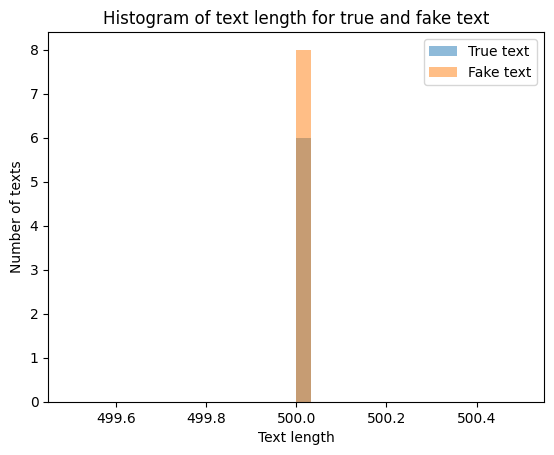

In [98]:
# show histogram of text length for true and fake text
plt.hist(fake_train_df[fake_train_df['label'] == 0]['text'].apply(len), bins=30, alpha=0.5, label='True text')
plt.hist(fake_train_df[fake_train_df['label'] == 1]['text'].apply(len), bins=30, alpha=0.5, label='Fake text')

# add x and y axis labels
plt.xlabel('Text length')
plt.ylabel('Number of texts')

plt.title("Histogram of text length for true and fake text")

plt.legend(loc='upper right')

In [99]:
# print text where length is greater than 2000
print(fake_train_df[fake_train_df["text"].apply(len) > 2000]["text"].values[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [100]:
print("Average number of newlines in text with label 0 (=True text):", np.mean(fake_train_df[fake_train_df['label'] == 0]['text'].apply(lambda x: x.count("\n"))))
print("Average number of newlines in text with label 1 (=Fake text):", np.mean(fake_train_df[fake_train_df['label'] == 1]['text'].apply(lambda x: x.count("\n"))))

Average number of newlines in text with label 0 (=True text): 0.0
Average number of newlines in text with label 1 (=Fake text): 0.0


In [83]:
fake_train_df.describe()

,label
count,16.000000
mean,0.500000
std,0.516398
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [84]:
fake_train_df[fake_train_df["label"] == 1].describe()

,label
count,8.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [62]:
fake_train_df.head(20)

,text,label
0,Instruction: \n Write a funny and whimsical h...,0
1,Instruction: \n If McDonald’s were to go out ...,1
2,Instruction: \n what is the difference betwee...,1
3,Instruction: \n Who were the children of the ...,0
4,Instruction: \n Who was the first person to d...,0
5,Instruction: \n What was most important inven...,1


In [33]:
# filter out texts with length greater than 1000
fake_train_df_filtered = fake_train_df[fake_train_df["text"].apply(len) < 1000]
print("Average size of text with label 0 (=True text):", np.mean(fake_train_df_filtered[fake_train_df_filtered['label'] == 0]['text'].apply(len)))
print("Average size of text with label 1 (=Fake text):", np.mean(fake_train_df_filtered[fake_train_df_filtered['label'] == 1]['text'].apply(len)))


Average size of text with label 0 (=True text): 386.2857142857143
Average size of text with label 1 (=Fake text): 393.5


In [38]:
# compute wasserstein distance between true and fake text lengths
true_text_lengths = fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)
fake_text_lengths = fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)

wasserstein_distance(true_text_lengths, fake_text_lengths)


223.75

In [15]:
# compute wasserstein distance between true and fake text lengths
true_text_lengths = fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)
fake_text_lengths = fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)

wasserstein_distance(true_text_lengths, fake_text_lengths)


8.133333333333333

In [44]:
# find filtering such that wasserstein distance is minimized
wasserstein_distances = []
for i in range(300, 1000, 100):
    fake_train_df_filtered = fake_train_df[fake_train_df["text"].apply(len) < i]
    true_text_lengths = fake_train_df_filtered[fake_train_df_filtered['label'] == 0]['text'].apply(len)
    fake_text_lengths = fake_train_df_filtered[fake_train_df_filtered['label'] == 1]['text'].apply(len)
    wasserstein_distances.append({"threshold": i, "wasserstein_distance": wasserstein_distance(true_text_lengths, fake_text_lengths)})
wasserstein_distances


[{'threshold': 300, 'wasserstein_distance': 47.666666666666664},
 {'threshold': 400, 'wasserstein_distance': 66.0},
 {'threshold': 500, 'wasserstein_distance': 76.83333333333334},
 {'threshold': 600, 'wasserstein_distance': 76.83333333333334},
 {'threshold': 700, 'wasserstein_distance': 105.22857142857144},
 {'threshold': 800, 'wasserstein_distance': 105.22857142857144},
 {'threshold': 900, 'wasserstein_distance': 100.49999999999999}]